In [1]:
import torch

torch.cuda.is_available()

False

In [4]:
dir(torch)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

In [6]:
dir(torch.cuda.is_available)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [7]:
help(torch.cuda.is_available)

Help on function is_available in module torch.cuda:

is_available() -> bool
    Return a bool indicating if CUDA is currently available.



# Dateset类代码实战

In [3]:
from PIL import Image
# image = Image.open('/Users/mashunfeng/Desktop/dataset/train/ants/0013035.jpg',mode='r')
# image.show()
from torch.utils.data import Dataset
import os

In [8]:
images_path = os.listdir('/Users/mashunfeng/Desktop/dataset/train/ants')
images_path[0]

'957233405_25c1d1187b.jpg'

In [ ]:
class MyData(Dataset):
    # root_dir = '/Users/mashunfeng/Desktop/dataset/train'
    # label_dir = 'ants'
    def __init__(self, root_dir, label_dir):
        self.root_dir = root_dir
        self.label_dir = label_dir
        self.path = os.path.join(self.root_dir, self.lable_dir)
        self.images_path = os.listdir(self.path)
        
    def __getitem__(self, idx):
        
        

In [14]:

from torch import nn
import torch

# 3个特征输入，1个特征输出  
# 第一个数字可以理解为一个神经元可以接收多少个参数
# 第二个参数可以理解为有多少个神经元；如果有5个神经元表示，1个样本的输入传递给了5个神经元
model = nn.Linear(3,1) 
x = torch.Tensor([1,2,3])
model(x)



tensor([ 0.5122, -0.5804], grad_fn=<ViewBackward0>)

In [21]:
a = torch.ones(5)
# 转成numpy数据
a.numpy()

array([1., 1., 1., 1., 1.], dtype=float32)

In [24]:
import numpy as np
# 从numpy转成tensor
a = np.ones(5)
a

b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [25]:
#### 可以被求导
x = torch.randn(3,4,requires_grad=True)
x


tensor([[-1.0007, -0.0971,  0.3774,  1.2817],
        [-1.1217, -0.7383,  1.6382, -1.1052],
        [-1.6938, -0.4323, -0.9746,  1.4888]], requires_grad=True)

In [27]:
x = torch.randn(3,4)
x.requires_grad = True
x

tensor([[ 1.0866, -0.9554, -0.4295, -0.1604],
        [-0.2112,  0.3983, -1.0323, -1.5828],
        [-1.0046, -0.7961, -1.3934,  0.3186]], requires_grad=True)

In [28]:
b = torch.randn(3,4,requires_grad=True)
t = x + b
y = t.sum()
y

tensor(-2.2948, grad_fn=<SumBackward0>)

In [29]:
# 求导，反向传播，求梯度
y.backward()

In [33]:
b.grad


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [32]:
x.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [34]:
#
x.requires_grad,t.requires_grad,b.requires_grad

(True, True, True)

In [36]:
t.grad

/var/folders/h6/d6w_x4k97m5d1zdjxsr25p4h0000gn/T/ipykernel_4464/152863213.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  t.grad


# 线性回归

In [42]:
# 构造训练数据
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1,1) # 弄成 nX1 的矩阵
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [65]:
# 目标值  y = 2x + 3
y_values = [2*i+3 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1,1) # 弄成 nX1 的矩阵
y_train

array([[ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.],
       [23.]], dtype=float32)

In [84]:
## 用torch训练

import torch
import torch.nn as nn

#定义一个线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        # 搞个全连接层，也就是一个线性层
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self, x):
        ## 前向传播
        out = self.linear(x)
        return out
    
# 实例模型
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim,output_dim)

# 指定是否使用GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 损失函数 均方误差
loss_fun = nn.MSELoss()

# 优化器 随机梯度
optim = torch.optim.SGD(model.parameters(), lr=0.01)


In [85]:
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [236]:
## 开始训练
for epoch in range(1000):   
    #np数据转成tensor数据
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)
     
    print(inputs.dtype)    
    
    # 前向传播
    outputs = model(inputs)
    
    # 计算损失 
    loss = loss_fun(outputs, labels)

    # 求梯度，反向传播
    loss.backward()
    
    # 更新参数
    optim.step()
    
    # 梯度清零
    optim.zero_grad()
    
    if epoch % 100 == 0:
        print('epoch{}, loss{}'.format(epoch, loss.item()))

torch.float32


AttributeError: module 'torch.optim' has no attribute 'step'

In [88]:
# 输出训练好的参数
for name,param in model.named_parameters():
    print("训练的参数:",name," 参数值:",param)

训练的参数: linear.weight  参数值: Parameter containing:
tensor([[2.0013]], requires_grad=True)
训练的参数: linear.bias  参数值: Parameter containing:
tensor([2.9907], requires_grad=True)


In [81]:
# 保存模型
torch.save(model.state_dict(), 'model.pkl')

In [83]:
# 读模型
model.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

# 线性回归2

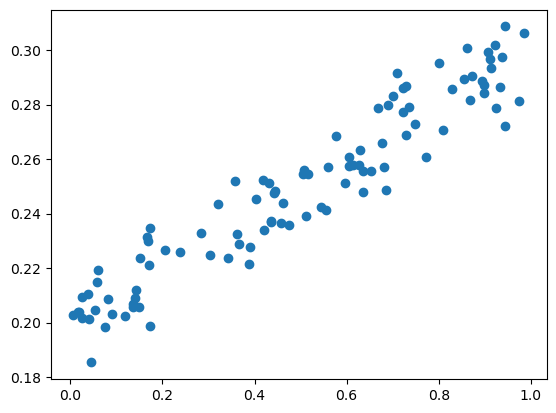

In [444]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
import torch
from torch.autograd import Variable

x_data = np.random.rand(100)
noise = np.random.normal(0,0.01, x_data.shape)
y_data = x_data*0.1 + 0.2 + noise

# 散点图 
plt.scatter(x_data,y_data)
plt.show()

权重数据类型： torch.float32
偏执数据类型： torch.float32
epoch:0 loss:1.163570761680603
    fc.weight tensor([[-0.6669]])
    fc.bias tensor([-0.3634])
epoch:400 loss:0.00022233113122638315
    fc.weight tensor([[0.0627]])
    fc.bias tensor([0.2194])
epoch:800 loss:9.538840822642669e-05
    fc.weight tensor([[0.0962]])
    fc.bias tensor([0.2016])
fc.weight tensor([[0.0988]])
fc.bias tensor([0.2002])


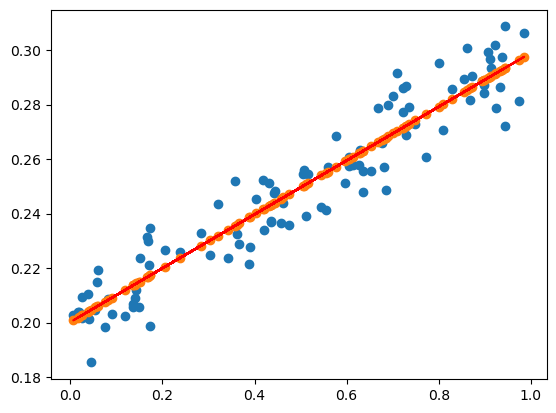

In [449]:
# 转换成二维数据，并转成tensor类型
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

#FloatTensor是32位float, 默认是64位float DoubleTensor
inputs = torch.FloatTensor(x_data)
target = torch.FloatTensor(y_data)

class MyLinear(nn.Module):
    def __init__(self):
        super(MyLinear, self).__init__()
        #定义一个线性层
        self.fc = nn.Linear(1,1)
        
        # 修改权重数据类型
        self.fc.weight.data = self.fc.weight.data.to(torch.float32)
        print('权重数据类型：',self.fc.weight.dtype)
        print('偏执数据类型：',self.fc.bias.dtype)
           
    def forward(self, inputs):
        out = self.fc(inputs)
        return out

model = MyLinear()

#损失函数
loss_fun = nn.MSELoss()
#优化器
optimizer = torch.optim.SGD(model.parameters(),lr=0.04)

torch.set_printoptions(precision=4,sci_mode=False)

#训练
for epoch in range(1000):
    y_hat = model(inputs) 
    #算损失
    loss = loss_fun(y_hat, target)
    #计算梯度
    loss.backward()
    #梯度更新
    optimizer.step()
    #梯度清零
    optimizer.zero_grad()
    
    if epoch % 400 == 0:
        print('epoch:{} loss:{}'.format(epoch,loss))
        for name,param in model.named_parameters():
            print('   ',name,param.data)

for name,param in model.named_parameters():
    print(name,param.data)
    
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data,'r-')
plt.scatter(x_data,y_pred.data)
plt.show()

# 非线性回归

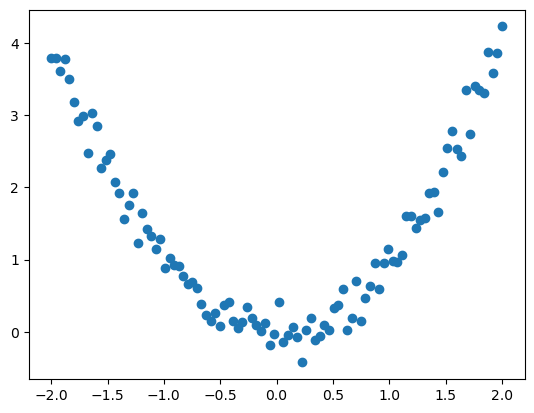

In [531]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
import torch
from torch.autograd import Variable

x_data = np.linspace(-2,2,100)[:,np.newaxis]
noise = np.random.normal(0,0.2, x_data.shape)
y_data = np.square(x_data) + noise

# 散点图 
plt.scatter(x_data,y_data)
plt.show()

# 转换成二维数据，并转成tensor类型
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)


class MyLinear(nn.Module):
    def __init__(self):
        super(MyLinear, self).__init__()
        #定义一个线性层
        self.fc1 = nn.Linear(1,10)
        self.fc2 = nn.Linear(10,1)
           
    def forward(self, inputs):
        x = self.fc1(inputs)
        # print('x====',x)
        x = relu(x);#nn.ReLU()(x)
        x = self.fc2(x)
        return x

model = MyLinear()

epoch:0 loss:1.318466067314148
epoch:400 loss:0.041462238878011703
epoch:800 loss:0.03997135907411575
fc1.weight Parameter containing:
tensor([[ 0.4689],
        [ 0.7921],
        [ 1.2826],
        [ 1.0988],
        [ 0.4677],
        [ 0.1393],
        [-0.4726],
        [ 0.1163],
        [-0.5546],
        [-1.3416]], requires_grad=True)
fc1.bias Parameter containing:
tensor([-0.1605,  0.0479, -0.4374, -1.0222,  0.2362, -0.3558,  0.6514,  0.6868,
         0.7710, -1.0004], requires_grad=True)
fc2.weight Parameter containing:
tensor([[ 0.2941,  0.4154,  1.0880,  1.2788,  0.0840,  0.0930,  0.4641, -0.2155,
          0.5925,  1.5473]], requires_grad=True)
fc2.bias Parameter containing:
tensor([-0.6318], requires_grad=True)


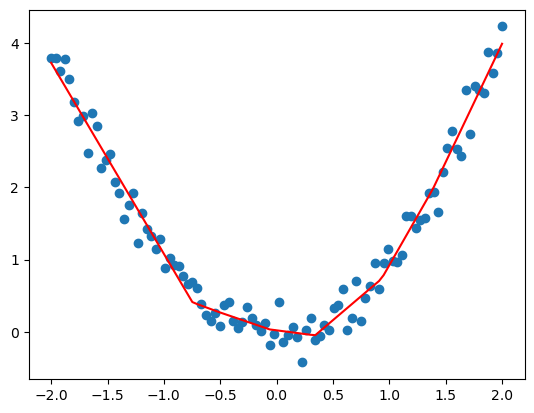

In [533]:
def relu(x):
    #x[x <= 0] = 0
    return torch.where(x>0, x,torch.zeros_like(x))

#损失函数
loss_fun = nn.MSELoss()
#优化器
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
torch.set_printoptions(precision=4,sci_mode=False)

#训练数据
inputs = torch.FloatTensor(x_data) #FloatTensor是32位float, 默认是64位float DoubleTensor
target = torch.FloatTensor(y_data)

# print(x_data)
# print(inputs)

#训练
for epoch in range(1000):
    y_hat = model(inputs) 
    # print(inputs)

    #算损失
    loss = loss_fun(y_hat, target)
    #计算梯度
    loss.backward()
    #梯度更新
    optimizer.step()
    #梯度清零
    optimizer.zero_grad()
    
    if epoch % 400 == 0:
        print('epoch:{} loss:{}'.format(epoch,loss))
        # for name,param in model.named_parameters():
        #     print('   ',name,param.data)

for name,param in model.named_parameters():
    print(name,param)
    
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-')
plt.show()

# print(y_pred)

# MINST手写数字识别-最小二乘法

In [570]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [571]:
# 下载训练集
train_dataset = datasets.MNIST(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=True, #下载训练数据
                              transform = transforms.ToTensor(), #数据转成tensor类型
                              download=True) #下载 True表示下载
# 下载测试集
test_dataset = datasets.MNIST(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=False, #False表示下载测试数据
                              transform = transforms.ToTensor(), #数据转成tensor类型
                              download=True) #下载

In [572]:
#批次大小
batch_size = 64

# 加载训练数据
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

# 加载测试数据
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_size,
                          shuffle=True)


In [573]:
# 查看加载数据的形状
for i,data in enumerate(train_loader):
    inputs, lables = data
    print(inputs.shape) #[64, 1, 28, 28] 64条数据，1个通道，28X28
    print(lables.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [561]:
len(test_loader) #长度，总共有多少批次

157

In [574]:
# 定义模型结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #简单点，就用一个全连接层
        self.fc = nn.Linear(28*28*1, 10) #接收单通道，28*28大小的图, 输出10个分类
    
    def forward(self, x):
        # 每次x是一个64个样本的数据，torch.Size([64, 1, 28, 28])
        # 转成矩阵 [64, 1, 28, 28] --> [64, 1*28*28]
        x = x.view(x.size()[0], -1) # x.size()[0]是64; -1表示自动
        x = self.fc(x)
        x = nn.Softmax()(x) #输出分类转成概率
        return x   

In [575]:
#实例模型
model = Net()
#定义损失函数，这里用最小二乘不是太合适，分类问题应该用交叉熵
#loss_fun = nn.CrossEntropyLoss
loss_fun = nn.MSELoss()
#优化器
optimizer = optim.SGD(model.parameters(), lr=0.5)

In [576]:
# 训练方法
def train():
    for i,data in enumerate(train_loader):
        # 取一个批次的样本数据和标签数据
        inputs,labels = data
        # 计算预测结果,形状是(64,10)
        out = model(inputs)
        
        #标签有(64) -> (64,1)
        labels = labels.reshape(-1,1)
        
        #目前标签和预测结果的形状不匹配，需要把标签做转换，把标签弄成one-hot编码
        one_hot = torch.zeros(inputs.shape[0],10).scatter(1,labels,1)
        
        # 计算损失
        # 这里是计算两个向量(预测的输出向量，和标签对应的one_hot向量)的方差
        # 比如 out     =   (0.01, 0.01 ,0.01, 0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
        #     one_hot =   (0   , 0    ,0   , 1   , 0   , 0   , 0   , 0   , 0   , 0)
        # 两个向量相减的方差就是损失, 理论上只有one_hot中位置为1的，和out中对应分类的概率越大，方差就越小，所以可行
        loss = loss_fun(out, one_hot)
        
        #反向传播
        loss.backward()
        #更新参数
        optimizer.step()
        
        #梯度清零
        optimizer.zero_grad()

#测试
def test():
    correct = 0
    
    for i,data in enumerate(test_loader):
        inputs,labels = data
        #获得预测结果 (64,10)
        out = model(inputs)
        #获取最大值以及最大值位置
        #1表示用out[0][1]中的第二个维度获取, 意思就是out的第二维的所有坐标都固定起来，比如out[i][0],out[i][1],out[i][2]...out[i][9]
        # max_data是对应的最大概率，max_data_index对应最大概率只对应的坐标,也就是预测值
        # 比如 (0.01, 0.01 ,0.01, 0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01) ,最大值是0.91,对应的坐标是3，也就是数字3
        max_data,max_data_index = torch.max(out,1)
        # max_data_index就是预测值
        predicted = max_data_index
        
        #计算正确的个数
        correct += (predicted == labels).sum()
    #准确率
    print("Test acc:{}".format(correct.item()/len(test_dataset)))

In [578]:
# 训练
for epoch in range(10):
    print("epoch:", epoch)
    train()
    test()

epoch: 0
Test acc:0.89
epoch: 1
Test acc:0.9018
epoch: 2
Test acc:0.9077
epoch: 3
Test acc:0.9106
epoch: 4
Test acc:0.912
epoch: 5
Test acc:0.9158
epoch: 6
Test acc:0.9178
epoch: 7
Test acc:0.9185
epoch: 8
Test acc:0.9195
epoch: 9
Test acc:0.9203


# MINST手写数字识别-交叉熵


In [579]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

# 下载训练集
train_dataset = datasets.MNIST(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=True, #下载训练数据
                              transform = transforms.ToTensor(), #数据转成tensor类型
                              download=True) #下载 True表示下载
# 下载测试集
test_dataset = datasets.MNIST(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=False, #False表示下载测试数据
                              transform = transforms.ToTensor(), #数据转成tensor类型
                              download=True) #下载

#批次大小
batch_size = 64

# 加载训练数据
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

# 加载测试数据
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_size,
                          shuffle=True)

# 查看加载数据的形状
for i,data in enumerate(train_loader):
    inputs, lables = data
    print(inputs.shape) #[64, 1, 28, 28] 64条数据，1个通道，28X28
    print(lables.shape)
    break

    # 定义模型结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #简单点，就用一个全连接层
        self.fc = nn.Linear(28*28*1, 10) #接收单通道，28*28大小的图, 输出10个分类
    
    def forward(self, x):
        # 每次x是一个64个样本的数据，torch.Size([64, 1, 28, 28])
        # 转成矩阵 [64, 1, 28, 28] --> [64, 1*28*28]
        x = x.view(x.size()[0], -1) # x.size()[0]是64; -1表示自动
        x = self.fc(x)
        x = nn.Softmax()(x) #输出分类转成概率
        return x   

#实例模型
model = Net()
#定义损失函数，分类问题应该用交叉熵
loss_fun = nn.CrossEntropyLoss()

#优化器
optimizer = optim.SGD(model.parameters(), lr=0.5)


# 训练方法
def train():
    for i,data in enumerate(train_loader):
        # 取一个批次的样本数据和标签数据
        inputs,labels = data
        # 计算预测结果,形状是(64,10)
        out = model(inputs)
        
        #这里out形状是(64,10)   lables是(64),不需要转成(64,1),因为交叉熵函数会自己转
        loss = loss_fun(out, labels)
        
        #反向传播
        loss.backward()
        #更新参数
        optimizer.step()
        
        #梯度清零
        optimizer.zero_grad()

#测试
def test():
    correct = 0
    
    for i,data in enumerate(test_loader):
        inputs,labels = data
        #获得预测结果 (64,10)
        out = model(inputs)
        #获取最大值以及最大值位置
        #1表示用out[0][1]中的第二个维度获取, 意思就是out的第二维的所有坐标都固定起来，比如out[i][0],out[i][1],out[i][2]...out[i][9]
        # max_data是对应的最大概率，max_data_index对应最大概率只对应的坐标,也就是预测值
        # 比如 (0.01, 0.01 ,0.01, 0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01) ,最大值是0.91,对应的坐标是3，也就是数字3
        max_data,max_data_index = torch.max(out,1)
        # max_data_index就是预测值
        predicted = max_data_index
        
        #计算正确的个数
        correct += (predicted == labels).sum()
    #准确率
    print("Test acc:{}".format(correct.item()/len(test_dataset)))
    

################# 训练  ###############
#######################################
for epoch in range(10):
    print("epoch:", epoch)
    train()
    test()

torch.Size([64, 1, 28, 28])
torch.Size([64])
epoch: 0


/Users/mashunfeng/anaconda3/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test acc:0.9052
epoch: 1
Test acc:0.9137
epoch: 2
Test acc:0.9167
epoch: 3
Test acc:0.9204
epoch: 4
Test acc:0.9198
epoch: 5
Test acc:0.9242
epoch: 6
Test acc:0.9228
epoch: 7
Test acc:0.9248
epoch: 8
Test acc:0.9227
epoch: 9
Test acc:0.9244


# MINST手写数字识别-Dropout

In [580]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

# 下载训练集
train_dataset = datasets.MNIST(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=True, #下载训练数据
                              transform = transforms.ToTensor(), #数据转成tensor类型
                              download=True) #下载 True表示下载
# 下载测试集
test_dataset = datasets.MNIST(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=False, #False表示下载测试数据
                              transform = transforms.ToTensor(), #数据转成tensor类型
                              download=True) #下载

#批次大小
batch_size = 64

# 加载训练数据
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

# 加载测试数据
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_size,
                          shuffle=True)

# 查看加载数据的形状
for i,data in enumerate(train_loader):
    inputs, lables = data
    print(inputs.shape) #[64, 1, 28, 28] 64条数据，1个通道，28X28
    print(lables.shape)
    break

# 定义模型结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(28*28*1,500),
                                    nn.Dropout(p=0.5), #对输出的500个神经元进行dropout,丢弃率是50%
                                    nn.Tanh())
        self.layer2 = nn.Sequential(nn.Linear(500,300),
                                    nn.Dropout(p=0.5), #对输出的300个神经元进行dropout,丢弃率是50%
                                    nn.Tanh())
        self.layer3 = nn.Sequential(nn.Linear(300,10),
                                    nn.Softmax(dim=1))
    
    def forward(self, x):
        # 每次x是一个64个样本的数据，torch.Size([64, 1, 28, 28])
        # 转成矩阵 [64, 1, 28, 28] --> [64, 1*28*28]
        x = x.view(x.size()[0], -1) # x.size()[0]是64; -1表示自动
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        
        return x   

#实例模型
model = Net()
#定义损失函数，分类问题应该用交叉熵
loss_fun = nn.CrossEntropyLoss()

#优化器
optimizer = optim.Adam(model.parameters(), lr=0.5)


########## 训练方法
def train():
    # 这是训练模式, 此时dropout起作用
    model.train()
    
    for i,data in enumerate(train_loader):
        # 取一个批次的样本数据和标签数据
        inputs,labels = data
        # 计算预测结果,形状是(64,10)
        out = model(inputs)
        
        #这里out形状是(64,10)   lables是(64),不需要转成(64,1),因为交叉熵函数会自己转
        loss = loss_fun(out, labels)
        
        #反向传播
        loss.backward()
        #更新参数
        optimizer.step()
        
        #梯度清零
        optimizer.zero_grad()

#############测试
def test():
    # 这是预测状态，此时dropout不起作用
    model.eval()
    
    #############计算测试的准确率
    correct = 0
    for i,data in enumerate(test_loader):
        inputs,labels = data
        #获得预测结果 (64,10)
        out = model(inputs)
        #获取最大值以及最大值位置
        #1表示用out[0][1]中的第二个维度获取, 意思就是out的第二维的所有坐标都固定起来，比如out[i][0],out[i][1],out[i][2]...out[i][9]
        # max_data是对应的最大概率，max_data_index对应最大概率只对应的坐标,也就是预测值
        # 比如 (0.01, 0.01 ,0.01, 0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01) ,最大值是0.91,对应的坐标是3，也就是数字3
        max_data,max_data_index = torch.max(out,1)
        # max_data_index就是预测值
        predicted = max_data_index
        
        #计算正确的个数
        correct += (predicted == labels).sum()
    #准确率
    print("Test acc:{}".format(correct.item()/len(test_dataset)))
    
    
    #########计算训练时的准确率
    correct = 0
    for i,data in enumerate(train_loader):
        inputs,labels = data
        #获得预测结果 (64,10)
        out = model(inputs)
        max_data,max_data_index = torch.max(out,1)
        # max_data_index就是预测值
        predicted = max_data_index
        
        #计算正确的个数
        correct += (predicted == labels).sum()
    #准确率
    print("Train acc:{}".format(correct.item()/len(train_dataset)))

################# 训练  ###############
#######################################
for epoch in range(10):
    print("epoch:", epoch)
    train()
    test()

torch.Size([64, 1, 28, 28])
torch.Size([64])
epoch: 0
Test acc:0.9177
Train acc:0.914
epoch: 1
Test acc:0.9292
Train acc:0.9266
epoch: 2
Test acc:0.9411
Train acc:0.94075
epoch: 3
Test acc:0.9431
Train acc:0.9455166666666667
epoch: 4
Test acc:0.9469
Train acc:0.9477833333333333
epoch: 5
Test acc:0.946
Train acc:0.9506833333333333
epoch: 6
Test acc:0.9513
Train acc:0.9559666666666666
epoch: 7
Test acc:0.9537
Train acc:0.9594
epoch: 8
Test acc:0.9581
Train acc:0.9624666666666667
epoch: 9
Test acc:0.9571
Train acc:0.9634166666666667


# MNIST手写数字识别--卷积神经网络CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

# 下载训练集
train_dataset = datasets.MNIST(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=True, #下载训练数据
                              transform = transforms.ToTensor(), #数据转成tensor类型
                              download=True) #下载 True表示下载
# 下载测试集
test_dataset = datasets.MNIST(root='/Users/mashunfeng/Desktop/dataset', #下载到的目录
                              train=False, #False表示下载测试数据
                              transform = transforms.ToTensor(), #数据转成tensor类型
                              download=True) #下载

#批次大小
batch_size = 64

# 加载训练数据
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

# 加载测试数据
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_size,
                          shuffle=True)

# 查看加载数据的形状
for i,data in enumerate(train_loader):
    inputs, lables = data
    print(inputs.shape) #[64, 1, 28, 28] 64条数据，1个通道，28X28
    print(lables.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [2]:
# 定义模型结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 定义卷积层                # 卷积后图像大小没变(28,28) -> (28,28)
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1,out_channels=32,kernel_size=5,stride=1,padding=2),
                                   nn.ReLU(),
                                   # 池化后后图像大小改变(28,28) -> (14,14)
                                   nn.MaxPool2d(kernel_size=2,stride=2))
                                    
        self.conv2 = nn.Sequential(nn.Conv2d(32,64,5,1,2),  # 卷积后图像大小没变(14,14) -> (14,14)
                                   nn.ReLU(),
                                   nn.MaxPool2d(2,2)) # 池化后后图像大小改变(14,14) -> (7,7)
       
        # 全连接
        self.fc1 = nn.Sequential(nn.Linear(64*7*7,1000),
                                 nn.Dropout(p=0.5),
                                 nn.ReLU())
        
        self.fc2 = nn.Sequential(nn.Linear(1000,10),
                                 nn.Softmax(dim=1))
    
    def forward(self, x):
        # 每次x是一个64个样本的数据，torch.Size([64, 1, 28, 28])
        x = self.conv1(x)
        x = self.conv2(x)
        
        # [64, 64, 7, 7] -> [64,7*7*64]
        x = x.view(x.size()[0],-1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x   

#实例模型
model = Net()
#定义损失函数，分类问题应该用交叉熵
loss_fun = nn.CrossEntropyLoss()

#学习率
LR=0.0003
#优化器
optimizer = optim.Adam(model.parameters(), LR)


########## 训练方法
def train():
    # 这是训练模式, 此时dropout起作用
    model.train()
    
    for i,data in enumerate(train_loader):
        # 取一个批次的样本数据和标签数据
        inputs,labels = data
        # 计算预测结果,形状是(64,10)
        out = model(inputs)
        
        #这里out形状是(64,10)   lables是(64),不需要转成(64,1),因为交叉熵函数会自己转
        loss = loss_fun(out, labels)
        
        #反向传播
        loss.backward()
        #更新参数
        optimizer.step()
        
        #梯度清零
        optimizer.zero_grad()

#############测试
def test():
    # 这是预测状态，此时dropout不起作用
    model.eval()
    
    #############计算测试的准确率
    correct = 0
    for i,data in enumerate(test_loader):
        inputs,labels = data
        #获得预测结果 (64,10)
        out = model(inputs)
        #获取最大值以及最大值位置
        #1表示用out[0][1]中的第二个维度获取, 意思就是out的第二维的所有坐标都固定起来，比如out[i][0],out[i][1],out[i][2]...out[i][9]
        # max_data是对应的最大概率，max_data_index对应最大概率只对应的坐标,也就是预测值
        # 比如 (0.01, 0.01 ,0.01, 0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01) ,最大值是0.91,对应的坐标是3，也就是数字3
        max_data,max_data_index = torch.max(out,1)
        # max_data_index就是预测值
        predicted = max_data_index
        
        #计算正确的个数
        correct += (predicted == labels).sum()
    #准确率
    print("Test acc:{}".format(correct.item()/len(test_dataset)))
    
    
    #########计算训练时的准确率
    correct = 0
    for i,data in enumerate(train_loader):
        inputs,labels = data
        #获得预测结果 (64,10)
        out = model(inputs)
        max_data,max_data_index = torch.max(out,1)
        # max_data_index就是预测值
        predicted = max_data_index
        
        #计算正确的个数
        correct += (predicted == labels).sum()
    #准确率
    print("Train acc:{}".format(correct.item()/len(train_dataset)))

################# 训练  ###############
#######################################
for epoch in range(10):
    print("epoch:", epoch)
    train()
    test()

epoch: 0
Test acc:0.9749
Train acc:0.9741
epoch: 1
Test acc:0.9773
Train acc:0.9796166666666667
epoch: 2
Test acc:0.9858
Train acc:0.9863
epoch: 3
Test acc:0.9875
Train acc:0.9875666666666667
epoch: 4
Test acc:0.9893
Train acc:0.9913166666666666
epoch: 5
Test acc:0.9891
Train acc:0.9909666666666667
epoch: 6
Test acc:0.9906
Train acc:0.9923666666666666
epoch: 7
Test acc:0.9917
Train acc:0.99375
epoch: 8
Test acc:0.9907
Train acc:0.9933833333333333
epoch: 9
Test acc:0.9925
Train acc:0.9956666666666667


In [8]:
from torchvision import models

vgg_model = models.vgg16(pretrained=True)
print(vgg_model)

/Users/mashunfeng/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mashunfeng/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/mashunfeng/.cache/torch/hub/checkpoints/vgg16-397923af.pth
  7%|████▉                                                               | 38.0M/528M [00:44<09:35, 892kB/s]


KeyboardInterrupt: 

# PyTorch基本学习

In [18]:
# 创建随机张量
data =  torch.randn(2,3)
print(data)

# 查看随机数种子
print(torch.random.initial_seed())

tensor([[ 0.3069,  0.6139, -0.3548],
        [ 2.6311,  0.8008, -0.2450]])
18


In [19]:
# 固定随机数
torch.random.manual_seed(18)
data =  torch.randn(2,3)
print(data)

tensor([[ 0.5941, -0.1271, -0.7287],
        [ 0.7212, -0.5660,  0.5781]])


In [26]:
# 线性张量
data = torch.arange(1,10,2) # 1->10 步长2
print(data)

data = torch.linspace(1,10,9) # 1->10 选9个数，步长平均
print(data)

tensor([1, 3, 5, 7, 9])
tensor([ 1.0000,  2.1250,  3.2500,  4.3750,  5.5000,  6.6250,  7.7500,  8.8750,
        10.0000])


In [28]:
#
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [29]:
#
torch.ones(3,2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [36]:
# 创建值全部是 8 的张量
data = torch.full((3,2), 8)
print(data)

data = torch.full_like(data, 100)
print(data)

tensor([[8, 8],
        [8, 8],
        [8, 8]])
tensor([[100, 100],
        [100, 100],
        [100, 100]])


In [44]:
# 张量类型转换
data = torch.full((3,4),10)
print(data.dtype)

data = data.type(torch.DoubleTensor)
print(data.dtype)

data = data.float()
print(data.dtype)

torch.int64
torch.float64
torch.float32


In [46]:
# 创建张量
data = torch.FloatTensor((2,3))
print(data)

tensor([2., 3.])


#### 张量计算

In [48]:
# 不修改原数据的计算
def test():
    data = torch.randint(0,10, (2,3))
    print(data)
    
    # add()
    data = data.add(10)
    print(data)
    
    # sub() 减法
    # mul() 乘法
    # div() 除法
    # neg() 取反
    
test()

tensor([[2, 2, 1],
        [9, 7, 7]])
tensor([[12, 12, 11],
        [19, 17, 17]])


In [49]:
# 修改原数据的计算
def test():
    data = torch.randint(0,10, (2,3))
    print(data)
    
    # add_()
    data.add_(10)
    print(data)
    
    # sub_() 减法
    # mul_() 乘法
    # div_() 除法
    # neg_() 取反
    
test()

tensor([[4, 8, 7],
        [3, 9, 1]])
tensor([[14, 18, 17],
        [13, 19, 11]])


#### 阿达玛积运算
    矩阵对应位置元素相乘

In [52]:
# 用mul或*
data1 = torch.tensor([[1,2], 
                      [3,4]])
data2 = torch.tensor([[5,6], 
                      [7,8]])

data = data1.mul(data2)
print(data)

data = data1 * data2
print(data)

tensor([[ 5, 12],
        [21, 32]])
tensor([[ 5, 12],
        [21, 32]])


### 矩阵计算

In [57]:
data = torch.randint(0,10,(3,2,5))
print(data.stride())

(10, 5, 1)


In [62]:
data1 = torch.tensor([[1,2],
                      [3,4],
                      [5,6]])

data2 = torch.tensor([[5,6],
                      [7,8]])

data = data1 @ data2
print(data)

# mm() 计算两个维度的矩阵 data[i][j]
data = torch.mm(data1,data2) 
print(data)


tensor([[19, 22],
        [43, 50],
        [67, 78]])
tensor([[19, 22],
        [43, 50],
        [67, 78]])


In [66]:
# bmm() 计算3个维度的矩阵 data[i][j][k]
data1 = torch.randn(3,4,5)
data2 = torch.randn(3,5,3)
data = torch.bmm(data1,data2) 
print(data)

tensor([[[ 0.9964,  1.9718,  0.0641],
         [-0.3272, -3.0362, -0.6925],
         [ 0.8274, -0.0762, -0.8454],
         [-1.3114, -3.4587, -1.3376]],

        [[ 1.5810,  3.5793,  1.0822],
         [-0.2266,  1.0787,  0.4092],
         [-0.5876, -2.7757, -1.4944],
         [-2.4767,  1.8564,  0.5857]],

        [[ 0.6372,  0.6562, -2.5483],
         [-2.8657,  0.0904, -2.0266],
         [-3.2647, -0.2866,  0.4957],
         [-1.8968,  1.1686, -1.1006]]])


In [85]:
# matmul() 无维度限制
torch.random.manual_seed(18)
data1 = torch.randn(3,4,5)
data2 = torch.randn(3,5,3)
data = torch.matmul(data1,data2) 
print(torch.random.initial_seed())
print(data)

18
tensor([[[ 4.5145,  2.0553, -7.0533],
         [ 0.0918,  0.6906,  2.2250],
         [ 1.8312,  2.0340, -3.1979],
         [ 0.7531,  1.8300,  0.6993]],

        [[-0.6963,  0.2037,  0.9755],
         [ 2.3780,  2.0059, -1.3038],
         [-0.3010, -2.2333, -0.1264],
         [ 0.3133,  0.5992,  0.1793]],

        [[ 5.5450, -1.7780,  0.4283],
         [-3.5505,  3.3271,  1.5690],
         [ 0.0663, -0.4876, -1.0772],
         [ 1.3774, -4.4170, -1.2264]]])


### 指定运算设备

In [86]:
data.device

device(type='cpu')

In [87]:
data = torch.tensor([10,20,30])
# 放到cuda
data.cuda()
print(data.device)

# 放到cpu
data.cpu()
print(data.device)

# 放到cpu
data.to('cpu')

AssertionError: Torch not compiled with CUDA enabled

### 张量数据转换

In [101]:
# 共享内存
data1 = torch.tensor([1,2,3])
data2 = data1.numpy()

data2[0] = 9

print(data1)
print(data2)

data2[0] = 10
# 用copy避免内存共享
data3 = data1.numpy().copy()
print(data3)

tensor([9, 2, 3])
[9 2 3]
[10  2  3]


In [104]:
# numpy转张量
# from_numpy() 默认共享内存
# torch.tensor() 默认不共享内存
data_numpy = np.array([2,3,4])
data_tensor = torch.from_numpy(data_numpy)
data_tensor[1] = 4
print(data_numpy)
print(data_tensor)

[2 4 4]
tensor([2, 4, 4])


In [110]:
# 不共享内存
data_numpy = np.array([1,1,2])
data_tensor = torch.tensor(data_numpy)
print(data_tensor)

tensor([1, 1, 2])


### 标量张量数字转换

In [115]:
t1 = torch.tensor(30)
t2 = torch.tensor([30])
t3 = torch.tensor([[30]])

print(t1.shape)
print(t2.shape)
print(t3.shape)

# 张量中只有一个元素可以用item() 提取标量
print(t1.item())
print(t2.item())
print(t3.item())

# 这里会报错
t4  = torch.tensor([30,40])
print(t4.item())

torch.Size([])
torch.Size([1])
torch.Size([1, 1])
30
30
30


RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

### 张量拼接操作

In [130]:
data1 = torch.randint(0,10, (3,4,5))
data2 = torch.randint(0,10, (3,4,5))
print(data1.shape)
print(data2.shape)
print('-'*30)

# 按照第0维拼接
new_data = torch.cat([data1,data2], dim=0)
print(new_data.shape)
print('-'*30)

# 按照第1维拼接
new_data = torch.cat([data1,data2], dim=1)
print(new_data.shape)
print('-'*30)

# 按照第2维拼接
new_data = torch.cat([data1,data2], dim=2)
print(new_data.shape)
print('-'*30)

torch.Size([3, 4, 5])
torch.Size([3, 4, 5])
------------------------------
torch.Size([6, 4, 5])
------------------------------
torch.Size([3, 8, 5])
------------------------------
torch.Size([3, 4, 10])
------------------------------


### 张量叠加

In [137]:
# 沿一个新维度对输入一系列张量进行连接，序列中所有张量应为相同形状
#，stack 函数返回的结果会新增一个维度。也即是把多个2维的张量凑成一个3维的张量
#；多个3维的凑成一个4维的张量…以此类推，也就是在增加新的维度上面进行堆叠。
data1 = torch.randint(0,10, (2,3))
data2 = torch.randint(0,10, (2,3))
print(data1)
print(data2)
print('-'*30)

# 两个张量叠加起来, 按0维度叠加
new_data = torch.stack([data1,data2], dim=0)
print(new_data.shape)
print(new_data)
print('-'*30)


# 两个张量叠加起来, 按1维度叠加
new_data = torch.stack([data1,data2], dim=1)
print(new_data.shape)
print(new_data)
print('-'*30)


# 两个张量叠加起来, 按2维度叠加
new_data = torch.stack([data1,data2], dim=2)
print(new_data.shape)
print(new_data)
print('-'*30)

tensor([[0, 9, 5],
        [3, 4, 3]])
tensor([[8, 2, 2],
        [7, 9, 6]])
------------------------------
torch.Size([2, 2, 3])
tensor([[[0, 9, 5],
         [3, 4, 3]],

        [[8, 2, 2],
         [7, 9, 6]]])
------------------------------
torch.Size([2, 2, 3])
tensor([[[0, 9, 5],
         [8, 2, 2]],

        [[3, 4, 3],
         [7, 9, 6]]])
------------------------------
torch.Size([2, 3, 2])
tensor([[[0, 8],
         [9, 2],
         [5, 2]],

        [[3, 7],
         [4, 9],
         [3, 6]]])
------------------------------


### 布尔索引

In [140]:
data = torch.randint(0,10, (4,5))
print(data)

# 获取大于3的布局
print(data > 3)

# 获取大于3的数据
print(data[data>3])

tensor([[6, 5, 7, 1, 1],
        [1, 5, 4, 3, 3],
        [5, 7, 0, 6, 9],
        [9, 8, 8, 3, 1]])
tensor([[ True,  True,  True, False, False],
        [False,  True,  True, False, False],
        [ True,  True, False,  True,  True],
        [ True,  True,  True, False, False]])
tensor([6, 5, 7, 5, 4, 5, 7, 6, 9, 9, 8, 8])


In [179]:
print(data.shape)
print(data)
print('-'*30)

# 返回第2列大于6的布尔布局
print('返回第2列大于6的布尔布局\n',data[:,1] > 6)
print('-'*30)

# 把是True的行选出来
print('把是True的行选出来\n',data[[False, False,  True,  True]])
print('-'*30)

# 把是True的列选出来
print('把是True的列选出来\n',data[:,[False, False,  True,  True,True]])
print('-'*30)


# 选第2、3行数据
print('选第2、3行数据\n',data[[2,3]])
print('-'*30)

# 选2、3列数据
print('选2、3列数据\n',data[:, [2,3]])
print('-'*30)

torch.Size([4, 5])
tensor([[6, 5, 7, 1, 1],
        [1, 5, 4, 3, 3],
        [5, 7, 0, 6, 9],
        [9, 8, 8, 3, 1]])
------------------------------
返回第2列大于6的布尔布局
 tensor([False, False,  True,  True])
------------------------------
把是True的行选出来
 tensor([[5, 7, 0, 6, 9],
        [9, 8, 8, 3, 1]])
------------------------------
把是True的列选出来
 tensor([[7, 1, 1],
        [4, 3, 3],
        [0, 6, 9],
        [8, 3, 1]])
------------------------------
选第2、3行数据
 tensor([[5, 7, 0, 6, 9],
        [9, 8, 8, 3, 1]])
------------------------------
选2、3列数据
 tensor([[7, 1],
        [4, 3],
        [0, 6],
        [8, 3]])
------------------------------


In [183]:
print(data[1]>3)
# 返回所有行，每列为True的数据
data[:, data[1]>3]

tensor([False,  True,  True, False, False])


tensor([[5, 7],
        [5, 4],
        [7, 0],
        [8, 8]])

### 多维索引

In [189]:
torch.manual_seed(0)
data = torch.randint(0,10, [3,4,5])
print(data)
print('-'*30)

print(data[0,:,:])
print('-'*30)

print(data[:,0,:])
print('-'*30)

print(data[:,:,0])
print('-'*30)

print(data[:,0,0])
print('-'*30)

tensor([[[4, 9, 3, 0, 3],
         [9, 7, 3, 7, 3],
         [1, 6, 6, 9, 8],
         [6, 6, 8, 4, 3]],

        [[6, 9, 1, 4, 4],
         [1, 9, 9, 9, 0],
         [1, 2, 3, 0, 5],
         [5, 2, 9, 1, 8]],

        [[8, 3, 6, 9, 1],
         [7, 3, 5, 2, 1],
         [0, 9, 3, 1, 1],
         [0, 3, 6, 6, 7]]])
------------------------------
tensor([[4, 9, 3, 0, 3],
        [9, 7, 3, 7, 3],
        [1, 6, 6, 9, 8],
        [6, 6, 8, 4, 3]])
------------------------------
tensor([[4, 9, 3, 0, 3],
        [6, 9, 1, 4, 4],
        [8, 3, 6, 9, 1]])
------------------------------
tensor([[4, 9, 1, 6],
        [6, 1, 1, 5],
        [8, 7, 0, 0]])
------------------------------
tensor([4, 6, 8])
------------------------------


In [198]:
torch.manual_seed(0)
data = torch.randint(0,10, [2,3,2,3])
print(data)
print(data[0,0,:,0])
print('-'*30)

# 取元素对应方式
[0,0,:,0]
[\0[\0[\:[\0 4, 9, 3],
  [0, 3, 9]],

 [[7, 3, 7],
  [3, 1, 6]],

 [[6, 9, 8],
  [6, 6, 8]]],


[[[4, 3, 6],
  [9, 1, 4]],

 [[4, 1, 9],
  [9, 9, 0]],

 [[1, 2, 3],
  [0, 5, 5]]]]

tensor([[[[4, 9, 3],
          [0, 3, 9]],

         [[7, 3, 7],
          [3, 1, 6]],

         [[6, 9, 8],
          [6, 6, 8]]],


        [[[4, 3, 6],
          [9, 1, 4]],

         [[4, 1, 9],
          [9, 9, 0]],

         [[1, 2, 3],
          [0, 5, 5]]]])
tensor([4, 0])
------------------------------


### 张量增加维度或减少维度

In [199]:
data = torch.randint(0,10, (1,3,1,5))
print(data.shape)

torch.Size([1, 3, 1, 5])


In [201]:
# 去掉所以1的维度
new_data = data.squeeze()
print(new_data.shape)

torch.Size([3, 5])


In [203]:
# 指定去掉某个1的维度
new_data =data.squeeze(0)
print(new_data.shape)

torch.Size([3, 1, 5])


In [207]:
# 指定位置增加一个维度，-1表示最后一个维度
new_data = data.unsqueeze(2)
print(new_data.shape)

torch.Size([1, 3, 1, 1, 5])


### 梯度计算

In [211]:
# 1.标量的梯度计算
x = torch.tensor(10, requires_grad=True, dtype=torch.float64)

# 对x的中间计算
y = x**2 + 20
# 自动微分
y.backward()
#访问梯度
print(x.grad)

tensor(20., dtype=torch.float64)


In [212]:
# 2.向量计算梯度
x = torch.tensor([10,20,30,40], requires_grad=True, dtype=torch.float64)
#中间计算
y = x**2 + 20
#向量无法自动计算梯度，需要转成一个标量后再计算
y = y.mean()
#
y.backward()
print(x.grad)

tensor([ 5., 10., 15., 20.], dtype=torch.float64)


In [216]:
# 3.多标量计算梯度
x1 = torch.tensor(10, requires_grad=True, dtype=torch.float64)
x2 = torch.tensor(20, requires_grad=True, dtype=torch.float64)

# 中间计算过程
y = x1**2 + x2**2 + x1*x2
y.backward()
print(x1.grad)
print(x2.grad)

tensor(40., dtype=torch.float64)
tensor(50., dtype=torch.float64)


In [217]:
# 4.多向量计算梯度
x1 = torch.tensor([10,20], requires_grad=True, dtype=torch.float64)
x2 = torch.tensor([30,40], requires_grad=True, dtype=torch.float64)

# 中间计算过程
y = x1**2 + x2**2 + x1*x2

# 变标量
y = y.sum()
y.backward()
print(x1.grad)
print(x2.grad)

tensor([50., 80.], dtype=torch.float64)
tensor([ 70., 100.], dtype=torch.float64)


In [234]:
# 5.梯度控制
x = torch.tensor(10, requires_grad=True, dtype=torch.float64)
print(x.requires_grad)

# 控制标量不进行梯度计算
with torch.no_grad():
    y = x**2
    y1 = x**3
print(y.requires_grad)
print(y1.requires_grad)

# 这种梯度计算传递不过去
y3 = y**2
print(y3.requires_grad)
y3.backward()

True
False
False
False


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [235]:
# 针对方法的梯度控制
@torch.no_grad()
def y_func(x):
    return x**2
y = y_func(x)
print(y.requires_grad)

False


In [242]:
# 全局控制梯度计算
torch.set_grad_enabled(False)
y = x * 2
print(y.requires_grad)

True


In [248]:
# 梯度清零
x = torch.tensor([10,20,30,40], requires_grad=True, dtype=torch.float64)
for _ in range(3):
    f1 = x**2 + 20
    f2 = f1.mean()
    
    # 梯度清零
    if x.grad is not None: 
        # 梯度清零, 不清零会累加
        x.grad.data.zero_()
    
    # 自动微分
    f2.backward()
    print(x.grad)

tensor([ 5., 10., 15., 20.], dtype=torch.float64)
tensor([ 5., 10., 15., 20.], dtype=torch.float64)
tensor([ 5., 10., 15., 20.], dtype=torch.float64)


In [259]:
# 梯度下降
x = torch.tensor([5], requires_grad=True, dtype=torch.float64)
for _ in range(10):
    # 正向计算
    y = x**2
    
    # 梯度清零
    if x.grad is not None: 
        # 梯度清零, 不清零会累加
        x.grad.data.zero_()
    
    # 计算梯度
    y.backward()
    
    # 梯度下降，更新参数
    x.data = x.data - 0.2 * x.grad
    
    print('%.5f' % x.data)

3.00000
1.80000
1.08000
0.64800
0.38880
0.23328
0.13997
0.08398
0.05039
0.03023


In [264]:
# 梯度计算注意
x = torch.tensor([10,20], requires_grad=True, dtype=torch.float64)
# 这里会报错，pytorch中，需要梯度计算的张量无法直接转numpy()，需要先用detach()方法进行张量剥离
#print(x.numpy())

# 这样就可以了
print(x.detach().numpy())

[10. 20.]
5622248848 5593085712


In [274]:
# 剥离的张量和原张量共享内存，且一个有梯度计算，一个没有梯度计算
x1 = torch.tensor([10,20], requires_grad=True, dtype=torch.float64)
x2 = x1.detach()

# id()查看变量内存地址
print(id(x1.data), id(x2.data))

print(x1)
print(x2)

x2[0] = 100
print(x1)
print(x2)

print(x1.requires_grad)
print(x2.requires_grad)

5593449584 5593449584
tensor([10., 20.], dtype=torch.float64, requires_grad=True)
tensor([10., 20.], dtype=torch.float64)
tensor([100.,  20.], dtype=torch.float64, requires_grad=True)
tensor([100.,  20.], dtype=torch.float64)
True
False


### 网络参数初始化

In [275]:
import torch
import torch.nn as nn


In [276]:
# 均匀分布初始化
linear = nn.Linear(5,3)
nn.init.uniform_(linear.weight)
print(linear.weight)

Parameter containing:
tensor([[0.9801, 0.1147, 0.3168, 0.6965, 0.9143],
        [0.9351, 0.9412, 0.5995, 0.0652, 0.5460],
        [0.1872, 0.0340, 0.9442, 0.8802, 0.0012]], requires_grad=True)


In [277]:
# 指定具体值初始化
linear = nn.Linear(5,3)
nn.init.constant_(linear.weight,99)
print(linear.weight)

Parameter containing:
tensor([[99., 99., 99., 99., 99.],
        [99., 99., 99., 99., 99.],
        [99., 99., 99., 99., 99.]], requires_grad=True)


In [279]:
# 全零, 权重不要初始化为0？？？？？
linear = nn.Linear(5,4)
nn.init.zeros_(linear.bias)
print(linear.bias)

Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)


In [280]:
# 全1
linear = nn.Linear(5,3)
nn.init.ones_(linear.weight)
print(linear.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)


In [281]:
# 正态分布
linear = nn.Linear(5,3)
nn.init.normal_(linear.weight, mean=0, std=1)
print(linear.weight)

Parameter containing:
tensor([[ 1.5152,  0.3698,  0.2815,  0.5603,  0.6311],
        [ 1.3469, -0.4519, -0.4053,  1.4875, -0.2230],
        [-1.0057, -0.4139,  1.1600, -0.2196,  1.9930]], requires_grad=True)


In [283]:
# kaming初始化
linear = nn.Linear(5,3)
nn.init.kaiming_normal_(linear.weight)
print(linear.weight)

linear = nn.Linear(5,3)
nn.init.kaiming_uniform_(linear.weight)
print(linear.weight)

Parameter containing:
tensor([[ 0.0962, -0.9131, -0.1445, -0.2246, -0.4566],
        [-0.1936,  0.8707,  0.6359, -0.1553, -0.1845],
        [ 0.9797, -0.5213, -0.4215, -0.7230, -0.1144]], requires_grad=True)
Parameter containing:
tensor([[ 1.0928,  0.6954, -0.7572,  0.4286,  0.8272],
        [ 1.0950,  0.9579,  0.8487, -0.2511, -0.3844],
        [ 0.8994,  0.6139, -0.6592,  0.9848,  0.5293]], requires_grad=True)


In [284]:
# xavier初始化
linear = nn.Linear(5,3)
nn.init.xavier_normal_(linear.weight)
print(linear.weight)

linear = nn.Linear(5,3)
nn.init.xavier_uniform_(linear.weight)
print(linear.weight)

Parameter containing:
tensor([[-0.4882,  0.0095, -0.5283, -0.5256,  0.6894],
        [ 0.7709,  0.2419, -0.0337,  0.2126,  0.6365],
        [-0.0978,  0.5773, -0.0047,  0.1322, -0.0734]], requires_grad=True)
Parameter containing:
tensor([[-0.1357,  0.7353,  0.0358, -0.6125, -0.2895],
        [-0.2351, -0.1671,  0.0829,  0.8009,  0.0464],
        [-0.5347,  0.0444,  0.4152,  0.4296, -0.7915]], requires_grad=True)
